# EDA

안개가 많을 것 같은 곳
- 습기가 많은 곳
- 바람이 약한 곳 (풍속이 느린 곳)
- 온도차가 심한 곳 (온도 변화가 심한 곳, 일교차가 심한 곳)
- 강수 유무가 안개에 영향을 미침
- 강, 하천, 호수, 바다 등지에서 습하기 떄문에 자주 발생
- 서해안보다 동해안에 많은 발생
- 해안 지방은 여름철에 도시는 겨울철에 안개가 발생한 일 수 가 많음
- 내륙지방은 복사안개가 가을, 겨울철에 자주 발생

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime
from pathlib import Path

import matplotlib.font_manager as fm

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name = 'NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({
    'font.size' : 10,
    'font.family' : 'NanumGothic'
})
plt.rc('font', family='NanumGothic')

import warnings
warnings.filterwarnings('ignore')

In [27]:
DATA = Path("../Data")

In [28]:
train = pd.read_csv(DATA / "fog_train_knn-imputate.csv")

In [29]:
train

,년월일시분,년도,월,일,시간,분,지점번호,지점번호1,지점번호2,NaN유무,시정구간,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정
0,2020-01-01 00:10:00,I,1,1,0,10,AA,A,A,0,4,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0
1,2020-01-01 00:20:00,I,1,1,0,20,AA,A,A,0,4,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0
2,2020-01-01 00:30:00,I,1,1,0,30,AA,A,A,0,4,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0
3,2020-01-01 00:40:00,I,1,1,0,40,AA,A,A,0,4,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0
4,2020-01-01 00:50:00,I,1,1,0,50,AA,A,A,0,4,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156455,2022-12-31 23:10:00,K,12,31,23,10,EC,E,C,0,4,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000.0
3156456,2022-12-31 23:20:00,K,12,31,23,20,EC,E,C,0,4,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000.0
3156457,2022-12-31 23:30:00,K,12,31,23,30,EC,E,C,0,4,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000.0
3156458,2022-12-31 23:40:00,K,12,31,23,40,EC,E,C,0,4,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000.0


In [30]:
train['지점번호1'], train['지점번호2'] = train['지점번호'].str.slice(0, 1), train['지점번호'].str.slice(1, 2)

In [31]:
train

,년월일시분,년도,월,일,시간,분,지점번호,지점번호1,지점번호2,NaN유무,시정구간,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정
0,2020-01-01 00:10:00,I,1,1,0,10,AA,A,A,0,4,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0
1,2020-01-01 00:20:00,I,1,1,0,20,AA,A,A,0,4,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0
2,2020-01-01 00:30:00,I,1,1,0,30,AA,A,A,0,4,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0
3,2020-01-01 00:40:00,I,1,1,0,40,AA,A,A,0,4,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0
4,2020-01-01 00:50:00,I,1,1,0,50,AA,A,A,0,4,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156455,2022-12-31 23:10:00,K,12,31,23,10,EC,E,C,0,4,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000.0
3156456,2022-12-31 23:20:00,K,12,31,23,20,EC,E,C,0,4,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000.0
3156457,2022-12-31 23:30:00,K,12,31,23,30,EC,E,C,0,4,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000.0
3156458,2022-12-31 23:40:00,K,12,31,23,40,EC,E,C,0,4,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000.0


In [32]:
train_year_I = train.query("년도=='I'")
train_year_I

,년월일시분,년도,월,일,시간,분,지점번호,지점번호1,지점번호2,NaN유무,시정구간,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정
0,2020-01-01 00:10:00,I,1,1,0,10,AA,A,A,0,4,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0
1,2020-01-01 00:20:00,I,1,1,0,20,AA,A,A,0,4,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0
2,2020-01-01 00:30:00,I,1,1,0,30,AA,A,A,0,4,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0
3,2020-01-01 00:40:00,I,1,1,0,40,AA,A,A,0,4,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0
4,2020-01-01 00:50:00,I,1,1,0,50,AA,A,A,0,4,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051335,2020-12-31 23:10:00,I,12,31,23,10,EC,E,C,0,4,260.9,5.9,-0.3,0.0,65.1,0.0,-1.7,20000.0
3051336,2020-12-31 23:20:00,I,12,31,23,20,EC,E,C,0,4,264.3,5.5,-0.3,0.0,64.6,0.0,-1.7,20000.0
3051337,2020-12-31 23:30:00,I,12,31,23,30,EC,E,C,0,4,258.7,5.3,-0.2,0.0,64.4,0.0,-1.3,20000.0
3051338,2020-12-31 23:40:00,I,12,31,23,40,EC,E,C,0,4,263.6,5.7,-0.1,0.0,64.8,0.0,-1.1,20000.0


<Axes: xlabel='10분평균상대습도', ylabel='Count'>

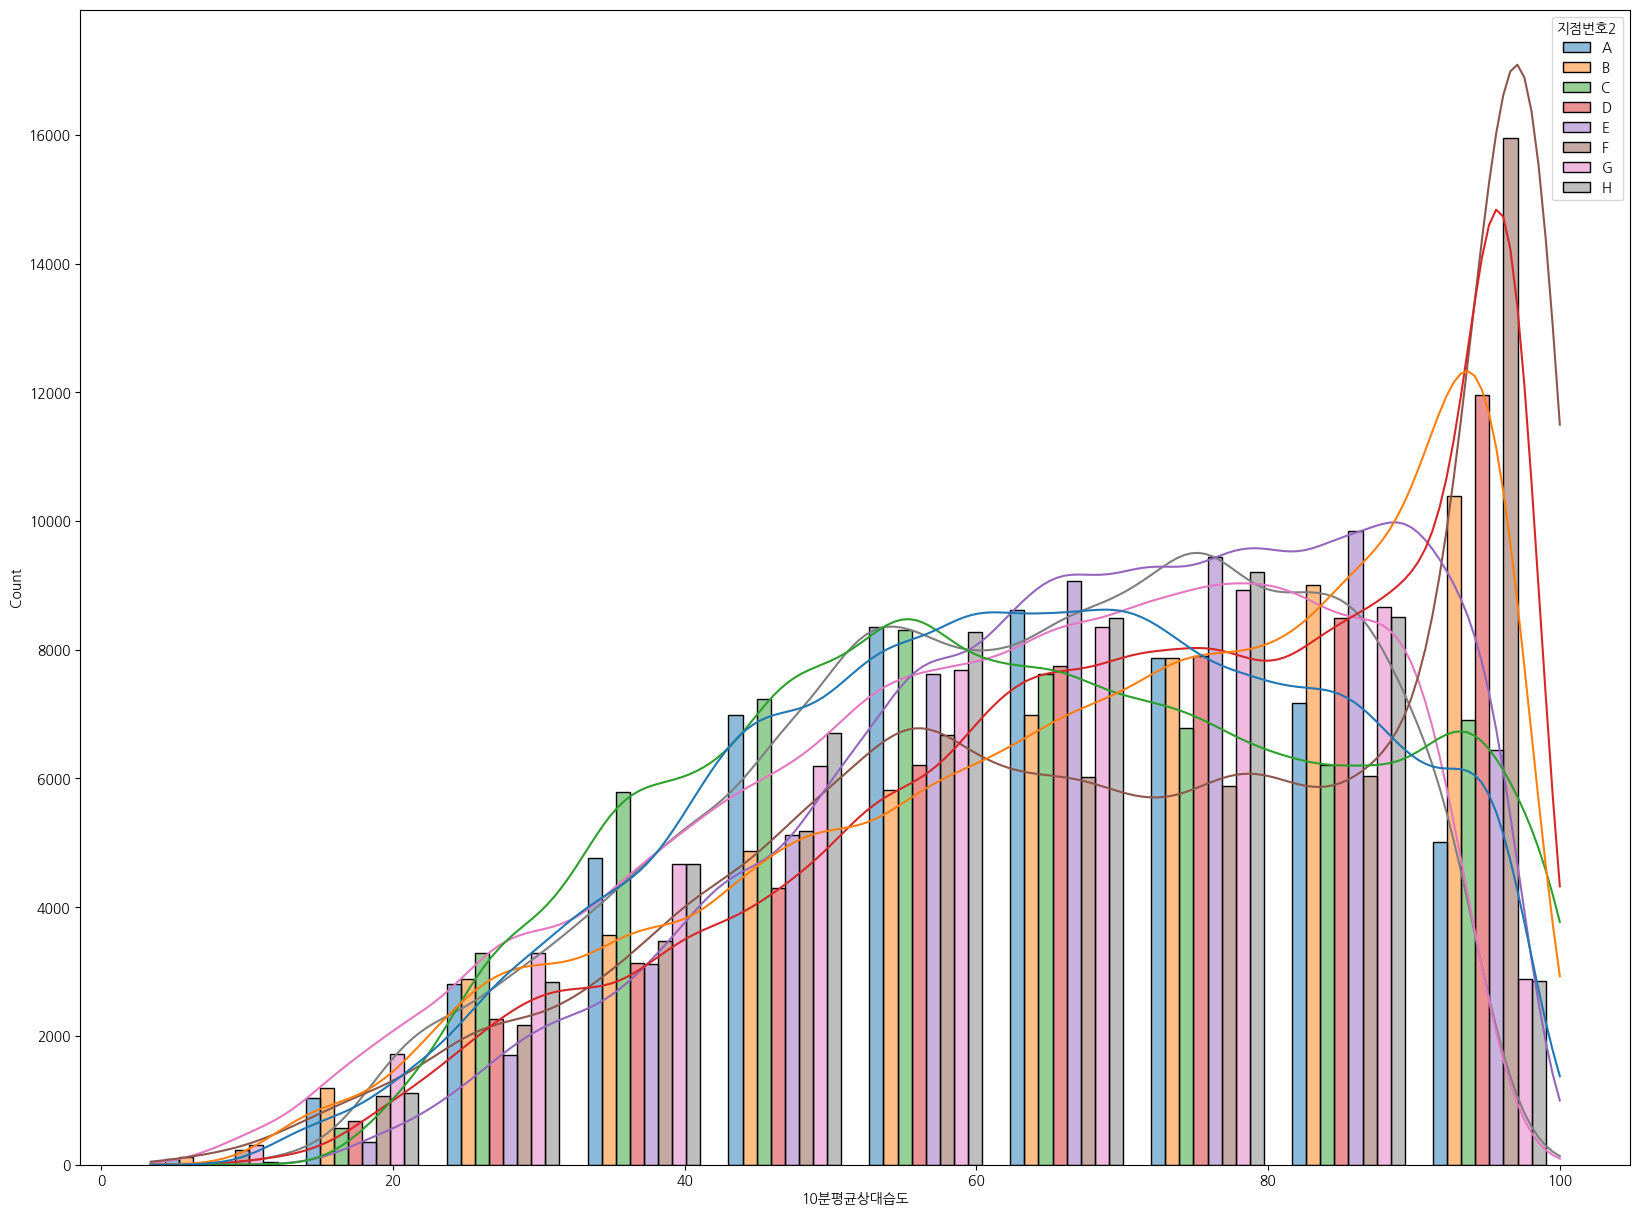

In [33]:
plt.figure(figsize=(20, 15))
sns.histplot(train_year_I, x=train_year_I[train_year_I["지점번호1"]=="A"]["10분평균상대습도"], hue='지점번호2', bins=10,multiple='dodge', kde=True, shrink=0.8)

<Axes: xlabel='10분평균상대습도', ylabel='Count'>

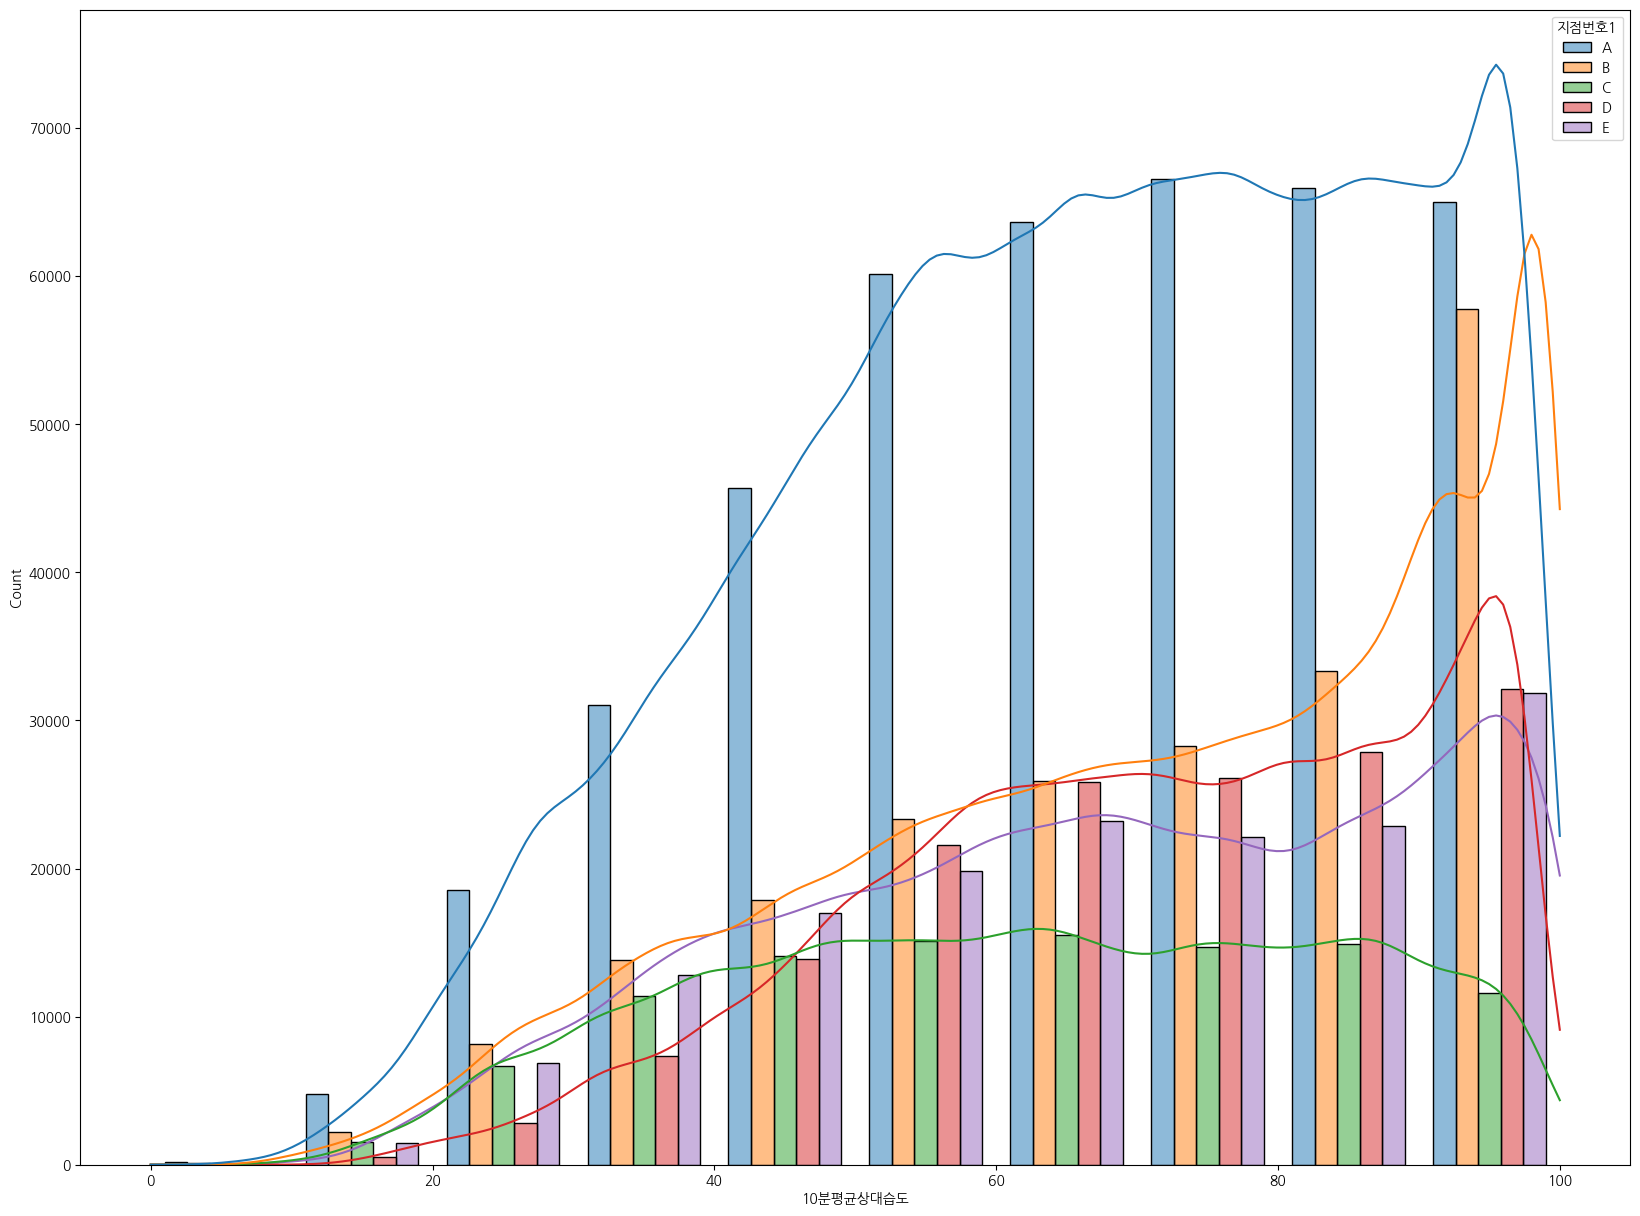

In [34]:
plt.figure(figsize=(20, 15))
sns.histplot(train_year_I, x=train_year_I["10분평균상대습도"], hue='지점번호1', bins=10, multiple='dodge', kde=True, shrink=0.8)

In [35]:
from tqdm.auto import tqdm

def make_ma(data, year, window_size):
    year_data = data.query(f"년도=='{year}'")
    points = data["지점번호"].unique()
    target_cols = ["10분평균풍향", "10분평균풍속", "10분평균기온", "10분평균상대습도", "10분일사량합", "10분평균지면온도", "10분평균시정"]
    store_cols = ['년도', '월', '일', '시간', '분', '년월일시분', '지점번호', '시정구간', '강수유무', 'NaN유무', '지점번호1', '지점번호2']
    new_data = pd.DataFrame()
    for point in tqdm(points):
        select_data = year_data.query(f"지점번호=='{point}'")
        # data rolling
        rolled_data = select_data[target_cols].rolling(window = window_size, min_periods=1).mean().reset_index(drop=True)
        store_data = select_data[store_cols].reset_index(drop=True)
        df_rolled = pd.concat([store_data, rolled_data], axis=1)
        new_data = pd.concat([new_data, df_rolled])
    
    new_data = new_data.reset_index(drop=True)
    
    return new_data

In [36]:
train_year_I_1day_ma = make_ma(train, 'I', 6 * 24)
train_year_I_1day_ma

  0%|          | 0/20 [00:00<?, ?it/s]

,년도,월,일,시간,분,년월일시분,지점번호,시정구간,강수유무,NaN유무,지점번호1,지점번호2,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정
0,I,1,1,0,10,2020-01-01 00:10:00,AA,4,0.0,0,A,A,0.000000,0.000000,-6.400000,38.900000,0.000000,-2.800000,20000.0
1,I,1,1,0,20,2020-01-01 00:20:00,AA,4,0.0,0,A,A,0.000000,0.000000,-6.350000,38.400000,0.000000,-2.750000,20000.0
2,I,1,1,0,30,2020-01-01 00:30:00,AA,4,0.0,0,A,A,0.000000,0.000000,-6.333333,38.933333,0.000000,-2.700000,20000.0
3,I,1,1,0,40,2020-01-01 00:40:00,AA,4,0.0,0,A,A,6.950000,0.100000,-6.300000,39.075000,0.000000,-2.675000,20000.0
4,I,1,1,0,50,2020-01-01 00:50:00,AA,4,0.0,0,A,A,17.500000,0.180000,-6.260000,39.220000,0.000000,-2.640000,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054055,I,12,31,23,10,2020-12-31 23:10:00,EC,4,0.0,0,E,C,272.202083,4.829861,-2.659028,56.670833,0.081458,1.229398,20000.0
1054056,I,12,31,23,20,2020-12-31 23:20:00,EC,4,0.0,0,E,C,271.940972,4.809028,-2.616667,56.711806,0.081458,1.250926,20000.0
1054057,I,12,31,23,30,2020-12-31 23:30:00,EC,4,0.0,0,E,C,271.709028,4.780556,-2.573611,56.752778,0.081458,1.275926,20000.0
1054058,I,12,31,23,40,2020-12-31 23:40:00,EC,4,0.0,0,E,C,271.477778,4.767361,-2.529167,56.790972,0.081458,1.302315,20000.0


In [37]:
train_year_I_1day_ma["년월일시분"] = train_year_I_1day_ma["년월일시분"].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [38]:
train_year_I_1day_ma.dtypes

년도                   object
월                     int64
일                     int64
시간                    int64
분                     int64
년월일시분        datetime64[ns]
지점번호                 object
시정구간                  int64
강수유무                float64
NaN유무                 int64
지점번호1                object
지점번호2                object
10분평균풍향             float64
10분평균풍속             float64
10분평균기온             float64
10분평균상대습도           float64
10분일사량합             float64
10분평균지면온도           float64
10분평균시정             float64
dtype: object

In [39]:
# plt.figure(figsize=(20, 10))
# sns.lineplot(train_year_I_1day_ma, x="년월일시분", y="10분평균풍속", hue="지점번호1")

In [ ]:
import plotly.express as px

fig1 = px.line(train_year_I_1day_ma, x="년월일시분", y="10분평균풍속", color="지점번호")
fig1

A 지점 별 습도 비교
- 

In [ ]:
fig2 = px.line(train_year_I_1day_ma, x="년월일시분", y="10분평균상대습도", color="지점번호")
fig2.update_xaxes(ticks= "outside",
                 ticklabelmode= "period", 
                 tickcolor= "black", 
                 ticklen=10, 
                 minor=dict(
                     ticklen=4,  
                     dtick=7*24*60*60*1000,  
                     tick0="2020-01-01 00:10:00", 
                     griddash='dot', 
                     gridcolor='white')
                )
fig2

In [ ]:
fig3 = px.histogram(train_year_I, x="시정구간", color='지점번호', barmode='group')
fig3.update_traces(opacity=0.6)
fig3

In [ ]:
fig4 = px.histogram(train_year_I[train_year_I["시정구간"]!=4], x="시정구간", color='지점번호', barmode='group')
fig4.update_traces(opacity=0.6)
fig4

In [44]:
plot_data = train_year_I[["년월일시분", "지점번호", "10분평균상대습도"]]

In [45]:
plot_data = pd.pivot_table(plot_data, index="년월일시분", values="10분평균상대습도", columns=['지점번호']).reset_index()

In [46]:
plot_data

지점번호,년월일시분,AA,AB,AC,AD,AE,AF,AG,AH,BA,...,BC,BD,CA,CB,DA,DB,DC,EA,EB,EC
0,2020-01-01 00:10:00,38.9,65.9,30.7,73.4,51.5,48.7,48.3,65.9,59.3,...,68.183333,51.3,26.6,39.2,50.2,65.3,84.7,21.4,53.0,40.4
1,2020-01-01 00:20:00,37.9,64.0,30.4,74.1,55.0,49.0,47.6,65.7,59.1,...,68.183333,56.1,29.1,38.5,50.9,65.1,84.7,21.6,56.6,40.4
2,2020-01-01 00:30:00,40.0,63.5,30.5,73.6,57.0,48.4,47.1,65.3,58.7,...,68.183333,59.2,31.3,38.0,51.2,65.2,83.0,21.9,54.9,40.6
3,2020-01-01 00:40:00,39.5,63.2,30.7,72.2,57.1,48.4,47.7,65.4,57.6,...,68.183333,60.8,33.7,38.5,51.9,65.4,81.1,22.5,55.4,41.0
4,2020-01-01 00:50:00,39.8,59.2,31.4,71.0,60.6,49.3,44.8,64.8,57.8,...,68.183333,59.9,35.3,38.2,54.3,65.1,79.5,22.1,56.7,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52698,2020-12-31 23:10:00,64.4,50.4,66.5,89.3,89.0,92.9,68.0,82.0,63.3,...,58.700000,67.7,36.2,54.6,61.9,82.3,89.9,55.6,74.5,65.1
52699,2020-12-31 23:20:00,64.3,50.9,65.8,89.3,87.6,92.6,68.9,81.4,62.7,...,56.800000,68.1,36.9,52.5,61.7,83.1,90.0,55.5,76.9,64.6
52700,2020-12-31 23:30:00,64.5,49.1,64.8,89.6,84.8,90.9,68.4,82.1,61.9,...,55.600000,68.5,37.0,51.5,61.8,81.3,90.4,55.6,77.3,64.4
52701,2020-12-31 23:40:00,64.1,51.6,64.6,89.7,84.3,85.4,71.2,82.7,62.5,...,53.500000,68.4,37.3,51.3,60.8,78.9,90.3,56.3,77.5,64.8


In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

point = list(plot_data.columns)
point.remove("년월일시분")

app.layout = html.Div([
    html.H4('지점 별 상대습도'),
    dcc.Graph(id="time-series-x-time-series-chart"),
    html.P("Point:"),
    dcc.Dropdown(
        id="time-series-x-ticker",
        options=point,
        value="AA",
        clearable=False,
    ),
])


@app.callback(
    Output("time-series-x-time-series-chart", "figure"), 
    Input("time-series-x-ticker", "value"))
def display_time_series(ticker):
    df = plot_data # replace with your own data source
    fig = px.line(df, x='년월일시분', y=ticker)
    return fig


if __name__ == "__main__":
    app.run_server(debug=True)


In [48]:
plot_data2 = train[["년월일시분", "지점번호", "10분평균상대습도", "년도"]]
plot_data2

,년월일시분,지점번호,10분평균상대습도,년도
0,2020-01-01 00:10:00,AA,38.9,I
1,2020-01-01 00:20:00,AA,37.9,I
2,2020-01-01 00:30:00,AA,40.0,I
3,2020-01-01 00:40:00,AA,39.5,I
4,2020-01-01 00:50:00,AA,39.8,I
...,...,...,...,...
3156455,2022-12-31 23:10:00,EC,50.2,K
3156456,2022-12-31 23:20:00,EC,50.1,K
3156457,2022-12-31 23:30:00,EC,51.0,K
3156458,2022-12-31 23:40:00,EC,51.7,K


In [49]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('년도 별 지점의 10분평균상대습도'),
    dcc.Graph(id="line-charts-x-graph"),
    dcc.Checklist(
        id="line-charts-x-checklist",
        options=plot_data2["년도"].unique(),
        value=["I"],
        inline=True
    ),
])


@app.callback(
    Output("line-charts-x-graph", "figure"), 
    Input("line-charts-x-checklist", "value"))
def update_line_chart(continents):
    df = plot_data2 # replace with your own data source
    mask = df.년도.isin(continents)
    fig = px.line(df[mask], 
        x="년월일시분", y="10분평균상대습도", color='지점번호')
    return fig


if __name__ == "__main__":
    app.run_server(debug=True)
